##IMPORTING THE LIBRARIES

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

CREATING THE MATRIX OF FEATURES AND THE DEPENDENT VARIABLE VECTOR

In [13]:
dataset = pd.read_csv('heart.csv') 
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [14]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##COUNT OF PEOPLE HAVING (1) AND NOT HAVING (0) THE DISEASE IN THE GIVEN DATATSET


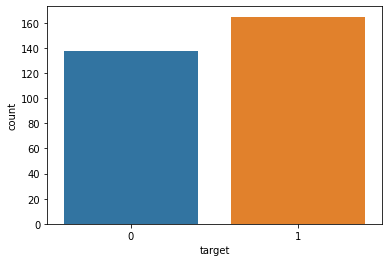

In [17]:
sns.countplot(x="target",data=dataset)

##ENCODING CATEGORICAL DATA
sex,cp,fbs,restecg,exang,slope,ca,thal,target are all categorical data. But we encode only cp,slope,thal as rest are already 0,1(encoded)

In [18]:
from sklearn.compose import ColumnTransformer  #column transformer is class
from sklearn.preprocessing import OneHotEncoder  #OneHotEncoder is also a class
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2,10,12])],remainder='passthrough')
                                                                        # passthrough is need to keep all columns else only encoded columns will remain in x
X=np.array(ct.fit_transform(X))

##SPLITTING THE DATA INTO TRAINING AND TEST SET

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
len(X_train)

242

In [21]:
X_train[0:5,:]

array([[0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 5.20e+01,
        1.00e+00, 1.18e+02, 1.86e+02, 0.00e+00, 0.00e+00, 1.90e+02,
        0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 6.70e+01,
        0.00e+00, 1.52e+02, 2.77e+02, 0.00e+00, 1.00e+00, 1.72e+02,
        0.00e+00, 0.00e+00, 1.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 5.70e+01,
        1.00e+00, 1.50e+02, 1.26e+02, 1.00e+00, 1.00e+00, 1.73e+02,
        0.00e+00, 2.00e-01, 1.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 5.70e+01,
        1.00e+00, 1.54e+02, 2.32e+02, 0.00e+00, 0.00e+00, 1.64e+02,
        0.00e+00, 0.00e+00, 1.00e+00],
       [0.00e+00, 1.00e+00, 

## APPLYING FEATURE SCALING ON NON CATEGORICAL DATA

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,:]=sc.fit_transform(X_train[:,:])
X_test[:,:]=sc.transform(X_test[:,:])

In [23]:
X_train

array([[-0.92050434, -0.46484449, -0.63794729, ..., -0.68313005,
        -0.93352855, -0.72428597],
       [-0.92050434, -0.46484449,  1.56752763, ..., -0.68313005,
        -0.93352855,  0.27160724],
       [-0.92050434, -0.46484449,  1.56752763, ..., -0.68313005,
        -0.75104558,  0.27160724],
       ...,
       [-0.92050434,  2.15125707, -0.63794729, ..., -0.68313005,
        -0.93352855, -0.72428597],
       [ 1.08636098, -0.46484449, -0.63794729, ...,  1.46385011,
         0.52633516, -0.72428597],
       [-0.92050434, -0.46484449,  1.56752763, ..., -0.68313005,
         0.52633516, -0.72428597]])

##LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,max_iter=100)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
i=0
accuracy=[]
accuracy.append(accuracy_score(y_test, y_pred)) 
i+=1

[[20 10]
 [ 5 26]]


In [26]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1]])

##KNN(LINEAR)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
Knnclassifier = KNeighborsClassifier(n_neighbors = 9)
Knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [28]:
Knn_y_pred = Knnclassifier.predict(X_test)

In [29]:
np.concatenate((Knn_y_pred.reshape(len(Knn_y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1]])

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, Knn_y_pred)
print(cm)

accuracy.append(accuracy_score(y_test, Knn_y_pred))
i+=1

[[25  5]
 [ 6 25]]


  ##SVM

In [31]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel = 'linear', random_state = 0)
SVMclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
SVM_pred = SVMclassifier.predict(X_test)

In [33]:
np.concatenate((SVM_pred.reshape(len(SVM_pred),1),y_test.reshape(len(y_test),1)),1)


array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1]])

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, SVM_pred)
print(cm)
accuracy.append(accuracy_score(y_test, SVM_pred))
i+=1

[[21  9]
 [ 3 28]]


##KERNEL SVM(RBF)

In [35]:
from sklearn.svm import SVC
RBF_classifier = SVC(kernel = 'rbf', random_state = 0)
RBF_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
RBF_y_predict = RBF_classifier.predict(X_test)

In [37]:
np.concatenate((RBF_y_predict.reshape(len(RBF_y_predict),1),y_test.reshape(len(y_test),1)),1)


array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 1]])

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, RBF_y_predict)
print(cm)

accuracy.append(accuracy_score(y_test, RBF_y_predict))
i+=1

[[21  9]
 [ 5 26]]


## NAIVE_BAYES

In [39]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
NB_y_predict= NBclassifier.predict(X_test)

In [41]:
np.concatenate((NB_y_predict.reshape(len(NB_y_predict),1),y_test.reshape(len(y_test),1)),1)


array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1]])

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,NB_y_predict)
print(cm)
accuracy.append(accuracy_score(y_test, NB_y_predict))
i+=1

[[22  8]
 [ 7 24]]


##DECISION TREE CLASSIFICATION

In [43]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [44]:
DT_y_predict = DTclassifier.predict(X_test)


In [45]:
np.concatenate((DT_y_predict.reshape(len(DT_y_predict),1),y_test.reshape(len(y_test),1)),1)


array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1]])

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,DT_y_predict)
print(cm)
accuracy.append(accuracy_score(y_test, DT_y_predict))
i+=1

[[20 10]
 [ 6 25]]


##RANDOM FOREST CLASSIFIER

In [47]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RFclassifier.fit(X_train,y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
RF_y_predict = RFclassifier.predict(X_test)

In [49]:
np.concatenate((RF_y_predict.reshape(len(RF_y_predict),1),y_test.reshape(len(y_test),1)),1)


array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 1]])

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,RF_y_predict)
print(cm)
accuracy.append(accuracy_score(y_test, RF_y_predict))
i+=1

[[21  9]
 [ 8 23]]


In [51]:
print(accuracy)

[0.7540983606557377, 0.819672131147541, 0.8032786885245902, 0.7704918032786885, 0.7540983606557377, 0.7377049180327869, 0.7213114754098361]


In [52]:
labels = ['Logistic Regression','KNN','SVM(linear)','SVM(RBF)','Naive Bayes','Decision Tree','Random Forest']

<BarContainer object of 7 artists>

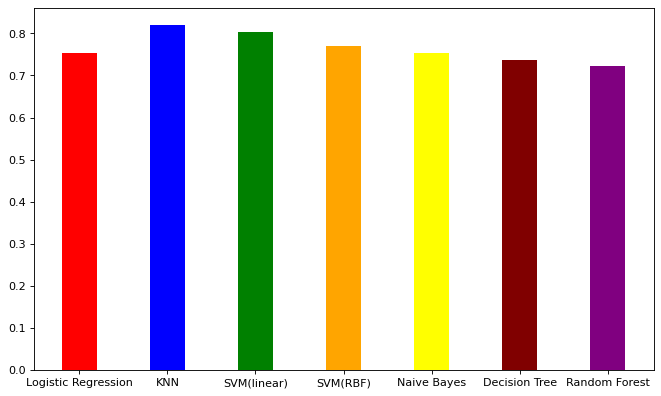

In [53]:
from matplotlib.pyplot import figure
colors = ['red','blue','green','orange','yellow','maroon','purple']
figure(figsize=(10, 6), dpi=80)

plt.bar(labels,accuracy,width=0.4,color = colors)

##CONCLUSION 
SVM (Linear ) works best for the given dataset for the default parameters